In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns

In [2]:
df_airline = pd.read_csv("airline_passengers.csv")

In [3]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.set_index("Month",inplace=True)

In [11]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

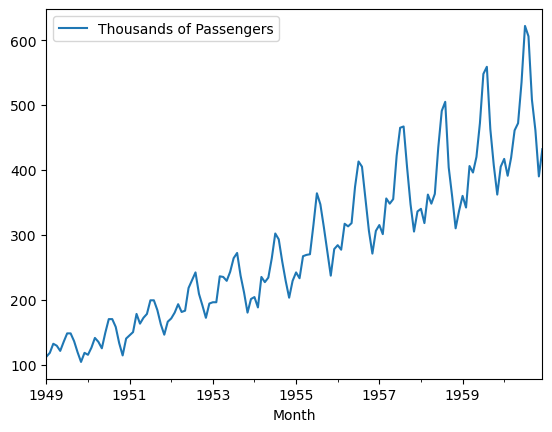

In [12]:
df_airline.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series) :
    result = adfuller(series)
    print('ADF Statistics : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    if result[1] <= 0.05 :
        print("strong evidance agaist the null hyphothesis, reject the null hypothesis")
    else :
        print("weak evidance agaist the null hyphothesis, accept the null hypothesis")

In [15]:
adf_test(df_airline["Thousands of Passengers"])

ADF Statistics : 0.8153688792060597
p-value : 0.9918802434376411
weak evidance agaist the null hyphothesis, accept the null hypothesis


##### (Null hypothesis is data is not stationary)

## Differencing

In [16]:
df_airline["Passengers First Difference"] = df_airline["Thousands of Passengers"] - df_airline["Thousands of Passengers"].shift(1)

In [17]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [18]:
adf_test(df_airline["Passengers First Difference"].dropna())

ADF Statistics : -2.829266824169992
p-value : 0.0542132902838265
weak evidance agaist the null hyphothesis, accept the null hypothesis


In [19]:
# differencing again
df_airline["Passengers second Difference"] = df_airline["Passengers First Difference"] - df_airline["Passengers First Difference"].shift(1)

In [20]:
adf_test(df_airline["Passengers second Difference"].dropna())

ADF Statistics : -16.384231542468527
p-value : 2.732891850014085e-29
strong evidance agaist the null hyphothesis, reject the null hypothesis


In [21]:
# for seasonal data
# 12 months
df_airline["Passengers 12 Difference"] = df_airline["Thousands of Passengers"] - df_airline["Thousands of Passengers"].shift(12)
adf_test(df_airline["Passengers 12 Difference"].dropna())

ADF Statistics : -3.3830207264924805
p-value : 0.011551493085514982
strong evidance agaist the null hyphothesis, reject the null hypothesis


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

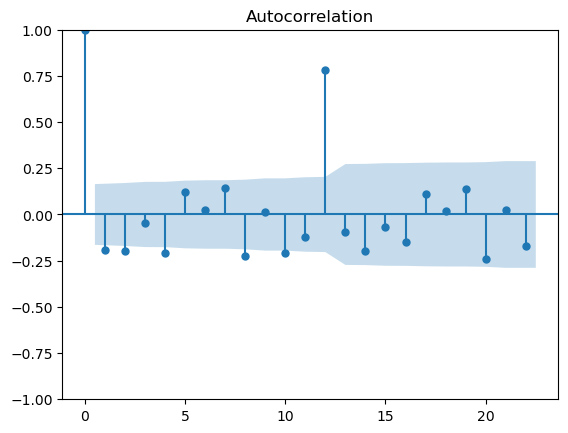

In [23]:
acf = plot_acf(df_airline["Passengers second Difference"].dropna())

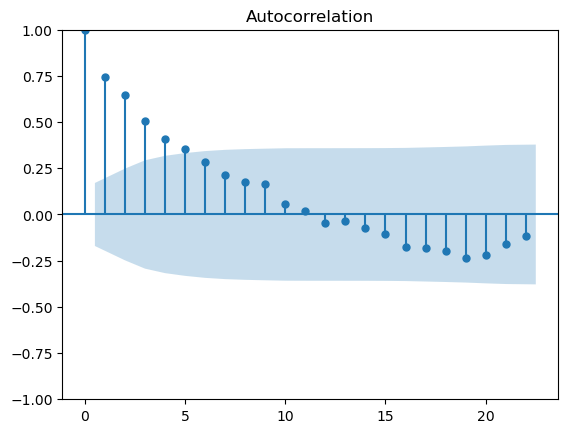

In [24]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

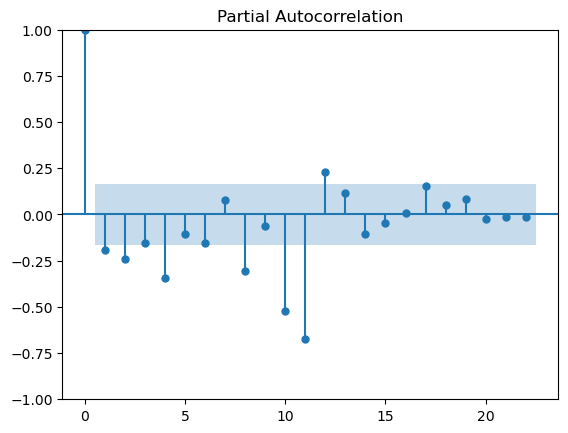

In [25]:
pacf = plot_pacf(df_airline["Passengers second Difference"].dropna())

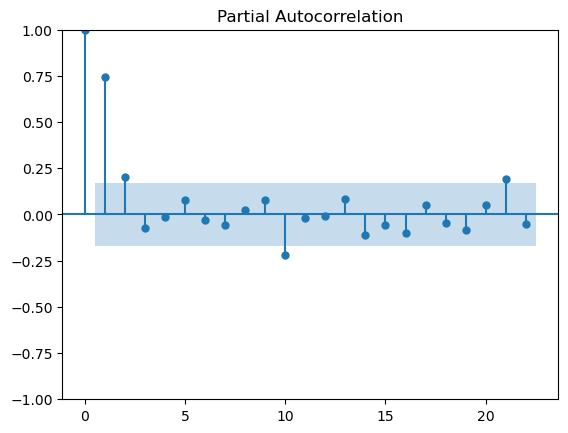

In [26]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [27]:
from datetime import datetime,timedelta
train_data_end = datetime(1955,12,1)
test_data_end = datetime(1960,12,1)

In [28]:
train_data = df_airline[:train_data_end]
test_data = df_airline[train_data_end + timedelta(days=1) : test_data_end]

In [29]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [30]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
#pip install statsmodels --upgrade

In [33]:
# actually q=12, if it is 12 it becomes sseasonal data .for convinience keep it 0
model_arima = ARIMA(train_data["Thousands of Passengers"],order=(11,2,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
#pip install pmdarima

In [34]:
from pmdarima import ARIMA

model_pmdarima = ARIMA(order=(11, 2, 12))
model_pmdarima_fit = model_pmdarima.fit(train_data["Thousands of Passengers"])


C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likeli

In [35]:
model_pmdarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:             SARIMAX(11, 2, 12)   Log Likelihood                -305.507
Date:                Thu, 07 Nov 2024   AIC                            661.013
Time:                        20:29:34   BIC                            721.181
Sample:                    01-01-1949   HQIC                           685.170
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2870      0.272      1.053      0.292      -0.247       0.821
ar.L1         -0.8056      0.422     -1.908      0.056      -1.633       0.022
ar.L2         -0.9262      0.147     -6.317      0.000      -1.214      -0.639
ar.L3         -0.8276      0.385     -2.147      0.032      -1.583      -0.072
ar.L4         -0.8579      0.110     -7.770      0.000      -1.074      -0.642
ar.L5         -0.8904      0.391     -2.280      0.023      -1.656      -0.125
ar.L6         -0.7605      0.157     -4.854      0.000      -1.068      -0.453
ar.L7         -0.8944      0.321     -2.785      0.005      -1.524      -0.265
ar.L8         -0.8434      0.144     -5.844      0.000      -1.126      -0.561
ar.L9         -0.9068      0.314     -2.892      0.004      -1.521      -0.292
ar.L10        -0.8515      0.129     -6.626      0.000      -1.103      -0.600
ar.L11        -0.7663      0.297     -2.582      0.010      -1.348      -0.185
ma.L1         -0.4021      0.954     -0.422      0.673      -2.271       1.467
ma.L2          0.0513      1.247      0.041      0.967      -2.393       2.496
ma.L3         -0.4185      1.206     -0.347      0.729      -2.782       1.945
ma.L4          0.1215      1.574      0.077      0.938      -2.964       3.207
ma.L5          0.0109      1.654      0.007      0.995      -3.230       3.252
ma.L6         -0.2157      1.542     -0.140      0.889      -3.238       2.807
ma.L7          0.2888      1.276      0.226      0.821      -2.212       2.790
ma.L8         -0.4422      0.992     -0.446      0.656      -2.387       1.502
ma.L9          0.4569      0.660      0.692      0.489      -0.837       1.750
ma.L10        -0.4371      0.425     -1.029      0.304      -1.270       0.396
ma.L11         0.0695      0.345      0.201      0.840      -0.607       0.746
ma.L12        -0.0327      0.285     -0.114      0.909      -0.592       0.527
sigma2        75.3131     38.684      1.947      0.052      -0.505     151.132
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               2.12   Skew:                             0.41
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
len(test_data)

60

In [38]:
pred = model_pmdarima_fit.predict(n_periods=60,start=pred_start_date,end=pred_end_date)

In [39]:
pred

1956-01-01    288.317066
1956-02-01    285.522553
1956-03-01    298.851593
1956-04-01    310.601236
1956-05-01    312.345717
1956-06-01    354.328761
1956-07-01    404.878357
1956-08-01    380.957635
1956-09-01    356.112747
1956-10-01    319.067502
1956-11-01    286.731720
1956-12-01    318.429522
1957-01-01    335.345201
1957-02-01    325.638742
1957-03-01    338.514054
1957-04-01    349.794329
1957-05-01    356.940048
1957-06-01    401.559597
1957-07-01    444.674521
1957-08-01    425.551703
1957-09-01    398.581981
1957-10-01    367.381513
1957-11-01    339.757479
1957-12-01    364.751293
1958-01-01    383.711226
1958-02-01    371.615531
1958-03-01    381.232257
1958-04-01    394.425322
1958-05-01    405.624917
1958-06-01    451.070633
1958-07-01    489.848657
1958-08-01    472.825200
1958-09-01    446.239012
1958-10-01    419.218439
1958-11-01    396.081149
1958-12-01    416.330787
1959-01-01    434.754828
1959-02-01    422.065854
1959-03-01    428.277047
1959-04-01    443.555671


In [40]:
residuals = test_data["Thousands of Passengers"]-pred

In [41]:
residuals

Month
1956-01-01     -4.317066
1956-02-01     -8.522553
1956-03-01     18.148407
1956-04-01      2.398764
1956-05-01      5.654283
1956-06-01     19.671239
1956-07-01      8.121643
1956-08-01     24.042365
1956-09-01     -1.112747
1956-10-01    -13.067502
1956-11-01    -15.731720
1956-12-01    -12.429522
1957-01-01    -20.345201
1957-02-01    -24.638742
1957-03-01     17.485946
1957-04-01     -1.794329
1957-05-01     -1.940048
1957-06-01     20.440403
1957-07-01     20.325479
1957-08-01     41.448297
1957-09-01      5.418019
1957-10-01    -20.381513
1957-11-01    -34.757479
1957-12-01    -28.751293
1958-01-01    -43.711226
1958-02-01    -53.615531
1958-03-01    -19.232257
1958-04-01    -46.425322
1958-05-01    -42.624917
1958-06-01    -16.070633
1958-07-01      1.151343
1958-08-01     32.174800
1958-09-01    -42.239012
1958-10-01    -60.218439
1958-11-01    -86.081149
1958-12-01    -79.330787
1959-01-01    -74.754828
1959-02-01    -80.065854
1959-03-01    -22.277047
1959-04-01    -47.5

<Axes: ylabel='Density'>

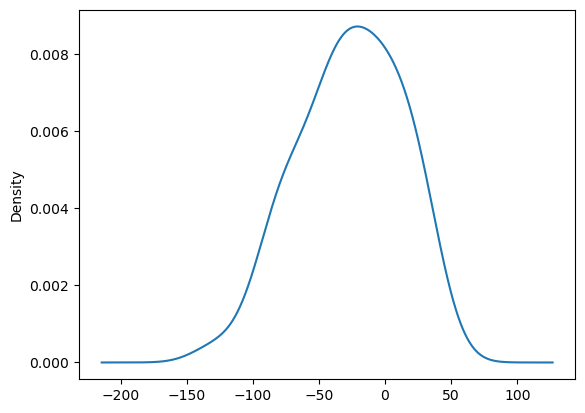

In [42]:
residuals.plot(kind="kde")

In [43]:
test_data.loc[:, "Predicted ARIMA"] = pred

C:\Users\Nags\AppData\Local\Temp\ipykernel_7200\1786292712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "Predicted ARIMA"] = pred


<Axes: xlabel='Month'>

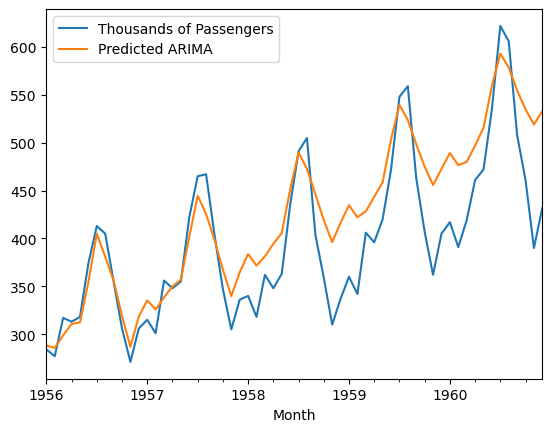

In [44]:
test_data[["Thousands of Passengers","Predicted ARIMA"]].plot()

### For seasonal data sometimes ARIMA won't works.use SARIMAX at that time

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model_sarima = SARIMAX(train_data["Thousands of Passengers"],order=(2,0,5),seasonal_order=(0,1,0,12))

C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_sarima_fit = model_sarima.fit()

In [48]:
pred_sarima = model_sarima_fit.predict(start=pred_start_date,end=pred_end_date)

In [49]:
residuals = test_data["Thousands of Passengers"]-pred_sarima

<Axes: ylabel='Density'>

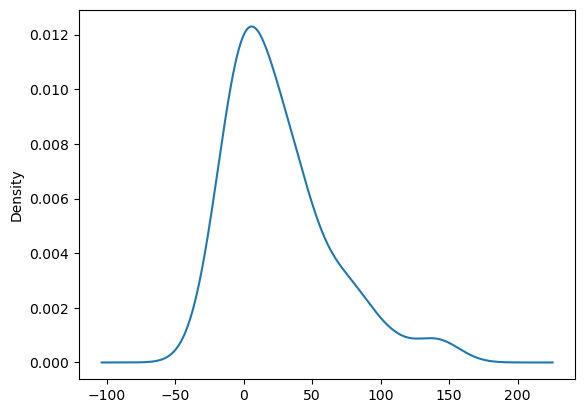

In [50]:
residuals.plot(kind="kde")

In [51]:
test_data.loc[:, "Predicted SARIMAX"] = pred_sarima

C:\Users\Nags\AppData\Local\Temp\ipykernel_7200\1257791920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "Predicted SARIMAX"] = pred_sarima


<Axes: xlabel='Month'>

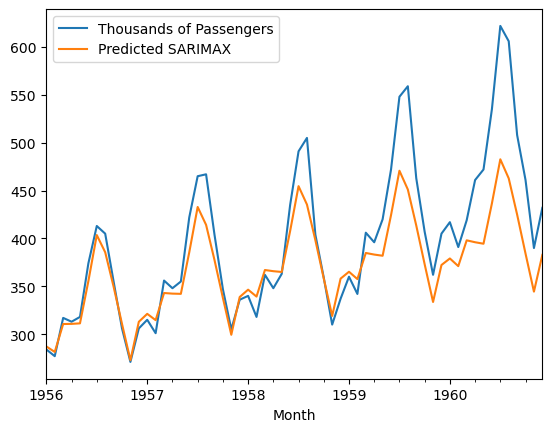

In [52]:
test_data[["Thousands of Passengers","Predicted SARIMAX"]].plot()

In [55]:
boxplot(Thousands of Passengers~cycle(Thousands of Passengers))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2366608253.py, line 1)